# Online Retail: Data Exploration Notebook

## Source  
Dr Daqing Chen, Director: Public Analytics group. chend '@' lsbu.ac.uk, School of Engineering, London South Bank University, London SE1 0AA, UK.

## Goals and Questions  
* Find groupings amongst customers (if any exist)  
* What items do customers buy most?  

In [1]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import PCA
from sklearn.cluster import Birch
from dotenv import load_dotenv
load_dotenv()

True

## How can customers be grouped together?  

Steps were first taken to transform the original data set (where each row represented a purchase of a particlar product by a customer when the customer purchased it) into a form where each row represented a customer and that customer's purchase history. The script `dataset_generator.py` handles the processes to make that happen, and some of the resulting data sets are used here.  

The script `dataset_generator.py` already automates the fitting of the cluster model and creates the data sets that include the customers segmented by cluster. This section of the notebook aims to visualize the clusters and also show why two principle components were used instead of three.  

In [2]:
online_retail_data = pd.read_csv(f"{os.getenv('PROJ_REPOS')}/data/Online_Retail_Train.csv", encoding='latin1')
quantities_of_purchases_by_customer = pd.read_csv(f"{os.getenv('PROJ_REPOS')}/data/Customer_Purchases.csv", encoding='latin1', index_col='CustomerID')
quantities_of_purchases_by_customer_norm = pd.read_csv(f"{os.getenv('PROJ_REPOS')}/data/Customer_Purchases_Norm.csv", encoding='latin1', index_col='CustomerID')

In [3]:
pca_2d = PCA(n_components=2)
principle_components_2d = pca_2d.fit_transform(quantities_of_purchases_by_customer_norm)
principle_2d_df = pd.DataFrame(data=principle_components_2d, columns=['pc1', 'pc2'])
principle_2d_df = principle_2d_df.set_index(quantities_of_purchases_by_customer_norm.index)
principle_2d_df

,pc1,pc2
CustomerID,,
12346,-0.101815,-0.004632
12347,0.860826,0.051597
12348,0.855418,0.026425
12349,0.884582,0.012625
12350,0.853535,0.034832
...,...,...
18280,-0.098363,-0.002413
18281,-0.091989,0.002320
18282,-0.099687,-0.000871


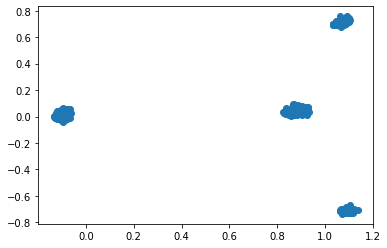

In [4]:
plt.scatter(principle_2d_df.pc1, principle_2d_df.pc2)
plt.show()

In [5]:
pca_3d = PCA(n_components=3)
principle_components_3d = pca_3d.fit_transform(quantities_of_purchases_by_customer_norm)
principle_3d_df = pd.DataFrame(data=principle_components_3d, columns=['pc1', 'pc2', 'pc3'])
principle_3d_df = principle_3d_df.set_index(quantities_of_purchases_by_customer_norm.index)
principle_3d_df

,pc1,pc2,pc3
CustomerID,,,
12346,-0.101815,-0.004597,-0.033388
12347,0.860826,0.051444,0.029741
12348,0.855418,0.026428,-0.003386
12349,0.884582,0.012789,-0.049280
12350,0.853535,0.034896,-0.037726
...,...,...,...
18280,-0.098363,-0.002384,-0.028559
18281,-0.091989,0.002323,-0.011573
18282,-0.099687,-0.000843,-0.035319


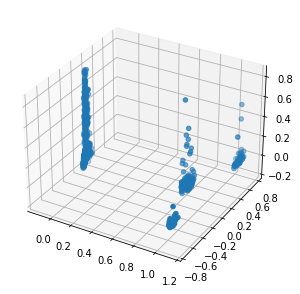

In [6]:
fig = plt.figure(figsize = (5, 5))
ax = plt.axes(projection ="3d")
ax.scatter3D(principle_3d_df.pc1, principle_3d_df.pc2, principle_3d_df.pc3)
plt.show()

In [7]:
clustering_model = Birch(threshold=0.01, n_clusters=4)
clustering_model.fit(principle_2d_df)
predictions = clustering_model.predict(principle_2d_df)
clusters = np.unique(predictions)

In [8]:
principle_2d_df['Cluster'] = predictions
principle_2d_df

,pc1,pc2,Cluster
CustomerID,,,
12346,-0.101815,-0.004632,3
12347,0.860826,0.051597,0
12348,0.855418,0.026425,0
12349,0.884582,0.012625,0
12350,0.853535,0.034832,0
...,...,...,...
18280,-0.098363,-0.002413,3
18281,-0.091989,0.002320,3
18282,-0.099687,-0.000871,3


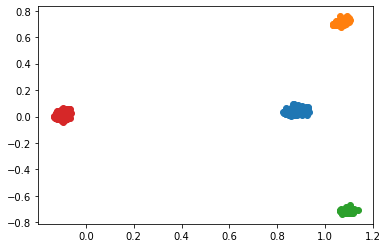

In [9]:
for cluster in clusters:
	pc1_cluster_n = principle_2d_df.query(f"Cluster == {cluster}").pc1
	pc2_cluster_n = principle_2d_df.query(f"Cluster == {cluster}").pc2
	plt.scatter(pc1_cluster_n, pc2_cluster_n)
plt.show()

## What do customers like to buy?

### Most popular products overall  

### Most popular products by cluster  

In [ ]:
online_retail_data = pd.read_csv(f"{os.getenv('PROJ_REPOS')}/data/Online_Retail_Train.csv", encoding='latin1')
online_retail_data = online_retail_data.astype({'StockCode': str, 'CustomerID': str})
online_retail_data.sample(n=10)

In [ ]:
customer_purchases = pd.read_csv(f"{os.getenv('PROJ_REPOS')}/data/Customer_Purchases_Clusters.csv", encoding='latin1')
customer_purchases = customer_purchases.astype({'CustomerID': str})
customer_purchases

In [ ]:
customer_purchases_norm = pd.read_csv(f"{os.getenv('PROJ_REPOS')}/data/Customer_Purchases_Clusters_Norm.csv", encoding='latin1')
customer_purchases_norm = customer_purchases_norm.astype({'CustomerID': str})
customer_purchases_norm

In [ ]:
stock_codes = list(set(online_retail_data.StockCode.astype(str).values))
stock_codes.sort()
for i, stock_code in enumerate(stock_codes):
    stock_codes[i] = stock_code.replace(' ', '_')
stock_codes = stock_codes[:-8]

In [ ]:
cluster0 = customer_purchases.query('Cluster == 0').set_index('CustomerID')
cluster0 = cluster0.loc[:, (cluster0 != 0).any(axis=0)]
cluster0['Cluster'] = 0
to_front_col = cluster0.pop('Cluster')
cluster0.insert(0, 'Cluster', to_front_col)
filter_col = [col for col in cluster0 if col in stock_codes]
cluster0[filter_col] = cluster0[filter_col].div(cluster0[filter_col].sum(axis=1), axis=0)
cluster0 = cluster0.dropna()
cluster0

In [ ]:
filter_col = [col for col in cluster0 if col in stock_codes]
cluster0_relative_stockcode_freq = pd.DataFrame(data = np.transpose(cluster0.groupby('Cluster').sum().reset_index()[filter_col]))
cluster0_relative_stockcode_freq = cluster0_relative_stockcode_freq.rename(columns={0: 'Cluster0'})
cluster0_relative_stockcode_freq

In [ ]:
stock_codes_with_highest_relative_value = pd.DataFrame(cluster0_relative_stockcode_freq.nlargest(10, ['Cluster0']).index).rename(columns={0: 'StockCode'})
cluster0_top_purchases = stock_codes_with_highest_relative_value.merge(online_retail_data, on='StockCode')[['StockCode', 'Description']].drop_duplicates().dropna()
cluster0_top_purchases['Desc_isupper'] = list(map(lambda x: x.isupper(), cluster0_top_purchases['Description']))
cluster0_top_purchases = cluster0_top_purchases.query('Desc_isupper == True').reset_index()[['StockCode', 'Description']]
cluster0_top_purchases

In [ ]:
cluster1 = customer_purchases.query('Cluster == 1').set_index('CustomerID')
cluster1 = cluster1.loc[:, (cluster1 != 0).any(axis=0)]
filter_col = [col for col in cluster1 if col in stock_codes]
cluster1[filter_col] = cluster1[filter_col].div(cluster1[filter_col].sum(axis=1), axis=0)
cluster1 = cluster1.dropna()
cluster1

In [ ]:
filter_col = [col for col in cluster1 if col in stock_codes]
cluster1_relative_stockcode_freq = pd.DataFrame(data = np.transpose(cluster1.groupby('Cluster').sum().reset_index()[filter_col]))
cluster1_relative_stockcode_freq = cluster1_relative_stockcode_freq.rename(columns={0: 'Cluster1'})
cluster1_relative_stockcode_freq

In [ ]:
stock_codes_with_highest_relative_value = pd.DataFrame(cluster1_relative_stockcode_freq.nlargest(10, ['Cluster1']).index).rename(columns={0: 'StockCode'})
cluster1_top_purchases = stock_codes_with_highest_relative_value.merge(online_retail_data, on='StockCode')[['StockCode', 'Description']].drop_duplicates().dropna()
cluster1_top_purchases['Desc_isupper'] = list(map(lambda x: x.isupper(), cluster1_top_purchases['Description']))
cluster1_top_purchases = cluster1_top_purchases.query('Desc_isupper == True').reset_index()[['StockCode', 'Description']]
cluster1_top_purchases

In [ ]:
cluster2 = customer_purchases.query('Cluster == 2').set_index('CustomerID')
cluster2 = cluster2.loc[:, (cluster2 != 0).any(axis=0)]
filter_col = [col for col in cluster2 if col in stock_codes]
cluster2[filter_col] = cluster2[filter_col].div(cluster2[filter_col].sum(axis=1), axis=0)
cluster2 = cluster2.dropna()
cluster2

In [ ]:
filter_col = [col for col in cluster2 if col in stock_codes]
cluster2_relative_stockcode_freq = pd.DataFrame(data = np.transpose(cluster2.groupby('Cluster').sum().reset_index()[filter_col]))
cluster2_relative_stockcode_freq = cluster2_relative_stockcode_freq.rename(columns={0: 'Cluster2'})
cluster2_relative_stockcode_freq

In [ ]:
stock_codes_with_highest_relative_value = pd.DataFrame(cluster2_relative_stockcode_freq.nlargest(10, ['Cluster2']).index).rename(columns={0: 'StockCode'})
cluster2_top_purchases = stock_codes_with_highest_relative_value.merge(online_retail_data, on='StockCode')[['StockCode', 'Description']].drop_duplicates().dropna()
cluster2_top_purchases['Desc_isupper'] = list(map(lambda x: x.isupper(), cluster2_top_purchases['Description']))
cluster2_top_purchases = cluster2_top_purchases.query('Desc_isupper == True').reset_index()[['StockCode', 'Description']]
cluster2_top_purchases

In [ ]:
cluster3 = customer_purchases.query('Cluster == 3').set_index('CustomerID')
cluster3 = cluster3.loc[:, (cluster3 != 0).any(axis=0)]
filter_col = [col for col in cluster3 if col in stock_codes]
cluster3[filter_col] = cluster3[filter_col].div(cluster3[filter_col].sum(axis=1), axis=0)
cluster3 = cluster3.dropna()
cluster3

In [ ]:
filter_col = [col for col in cluster3 if col in stock_codes]
cluster3_relative_stockcode_freq = pd.DataFrame(data = np.transpose(cluster3.groupby('Cluster').sum().reset_index()[filter_col]))
cluster3_relative_stockcode_freq = cluster3_relative_stockcode_freq.rename(columns={0: 'Cluster3'})
cluster3_relative_stockcode_freq

In [ ]:
stock_codes_with_highest_relative_value = pd.DataFrame(cluster3_relative_stockcode_freq.nlargest(10, ['Cluster3']).index).rename(columns={0: 'StockCode'})
cluster3_top_purchases = stock_codes_with_highest_relative_value.merge(online_retail_data, on='StockCode')[['StockCode', 'Description']].drop_duplicates().dropna()
cluster3_top_purchases['Desc_isupper'] = list(map(lambda x: x.isupper(), cluster3_top_purchases['Description']))
cluster3_top_purchases = cluster3_top_purchases.query('Desc_isupper == True').reset_index()[['StockCode', 'Description']]
cluster3_top_purchases

While it was intended that each top 10 list only had 10 results, it appears that stock codes are not exactly unique, but instead are a classification that is almost unique-like. A stock code will not take into account a color difference between white and cream, for example, but can still reffer to a "HANGING HEART T-LIGHT HOLDER"

Because of the way the relative sums that determine purchase popularity were calculuated, each sum includes all purchases of a product and its variants (slightly different product with the same stock code). Therefore, dropping rows with that would cause a stock code to be duplicated would not have an affect on the popularity order.  

In [ ]:
cluster3_top_purchases.drop_duplicates(subset='StockCode')